In [79]:
from math import *
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import time

In [119]:
NS = range(100000, 1000000, 100000)

In [93]:
def isPrime(N):
    if N <= 1:
        return False

    if N == 2 :
        return True
    
    if N%2 == 0 :
        return False
    
    for i in range(2, int(N**0.5+1)):
        if N%i == 0:
            return False
    
    return True

In [94]:
#BS:가장 기본적인 sieve
def sieve1(N):
    
    #짝수의 경우 초기화에서 처리
    primFlags = [False if (x)%2==0 else True for x in range(0, N)]
    primFlags[0] = False
    primFlags[1] = False
    primFlags[2] = True
    
    for i in range(3, N):
        #소수가 아닌 경우 건너띄는 부분
        if primFlags[i] == False:
            continue
        
        #해당 소수의 배수는 전부 제외
        interval = i
        next = i + interval
        while next <= (N - 1) :
            primFlags[next] = False
            next += interval
    
    return primFlags


In [95]:
#OOS: 소수를 한 단계씩 올리는 것이 아닌 두 단계씩 올리는 경우
def sieve2(N):
    #초기화
    
    #짝수의 경우 초기화에서 처리
    primFlags = [False if (x)%2==0 else True for x in range(0,N)]
    primFlags[0] = False
    primFlags[1] = False
    primFlags[2] = True
    
    for i in range(3, N):
        #소수가 아닌 경우 건너띄는 부분
        if primFlags[i] == False:
            continue
        
        #해당 소수의 배수는 전부 제외
        interval = 2 * i
        next = i + interval
        while next <= (N - 1) :
            primFlags[next] = False
            next += interval
    
    return primFlags

#print(sieve2(1000))


In [96]:
#SS: 루트 값까지만 검사
def sieve3(N):
    #초기화
    
    #짝수의 경우 초기화에서 처리
    primFlags = [False if (x)%2==0 else True for x in range(0,N)]
    primFlags[0] = False
    primFlags[1] = False
    primFlags[2] = True
    
    for i in range(3, int(sqrt(N)) + 1):
        #소수가 아닌 경우 건너띄는 부분
        if primFlags[i] == False:
            continue
        
        #해당 소수의 배수는 전부 제외
        interval = 2 * i
        next = i + interval
        while next <= (N - 1) :
            primFlags[next] = False
            next += interval
    
    return primFlags

#print(sieve3(1000))


In [97]:
#NS: numpy를 이용하여 계산
def sieve4(N):
    #초기화
    numArr = np.arange(N)
    primeFlags = np.full(N, True)
    primeFlags[0] = False
    primeFlags[1] = False
    
    for i in range(2, int(sqrt(N)) + 1):
        #소수가 아닌 경우 건너띄는 부분
        if primeFlags[i] == False:
            continue
        
        #해당 소수의 배수는 전부 제외
        primeFlags &= (numArr%i != 0)
        primeFlags[i] = True
    
    return primeFlags

#print(sieve4(1000))

In [123]:
def isPrimeSpeedCheck(NS):
    elapsed = []
    for n in NS:
        st = time.clock()
        primes = []
        for m in range(1, n):
            if isPrime(m):
                primes += [m]
        elapsed += [time.clock() - st]
    return elapsed

prev_elapsed = isPrimeSpeedCheck(NS)

In [125]:
def isPrimeSieveSpeedCheck(NS):
    elapsed = []
    for n in NS:
        st = time.clock()
        primes = []
        for m in range(1, n):
            if isPrimeSieve(m):
                primes += [m]
        elapsed += [time.clock() - st]
    return elapsed

prime_sieve_elapsed = isPrimeSieveSpeedCheck(NS)

In [99]:
def sieve1SpeedCheck(NS):
    elapsed = []
    for n in NS:
        st = time.clock()
        primes = []
        primes_flag = sieve1(n)
        for m in range(2, n):
            if primes_flag[m]:
                primes += [m]
        elapsed += [time.clock() - st]
    return elapsed

sieve1_elapsed = sieve1SpeedCheck(NS)

In [100]:
def sieve2SpeedCheck(NS):
    elapsed = []
    for n in NS:
        st = time.clock()
        primes = []
        primes_flag = sieve2(n)
        for m in range(2, n):
            if primes_flag[m]:
                primes += [m]
        elapsed += [time.clock() - st]
    return elapsed

sieve2_elapsed = sieve2SpeedCheck(NS)

In [101]:
def sieve3SpeedCheck(NS):
    elapsed = []
    for n in NS:
        st = time.clock()
        primes = []
        primes_flag = sieve3(n)
        for m in range(2, n):
            if primes_flag[m]:
                primes += [m]
        elapsed += [time.clock() - st]
    return elapsed

sieve3_elapsed = sieve3SpeedCheck(NS)

In [103]:
def sieve4SpeedCheck(NS):
    elapsed = []
    for n in NS:
        st = time.clock()
        primes = []
        primes_flag = sieve4(n)
        for m in range(2, n):
            if primes_flag[m]:
                primes += [m]
        elapsed += [time.clock() - st]
    return elapsed

sieve4_elapsed = sieve4SpeedCheck(NS)

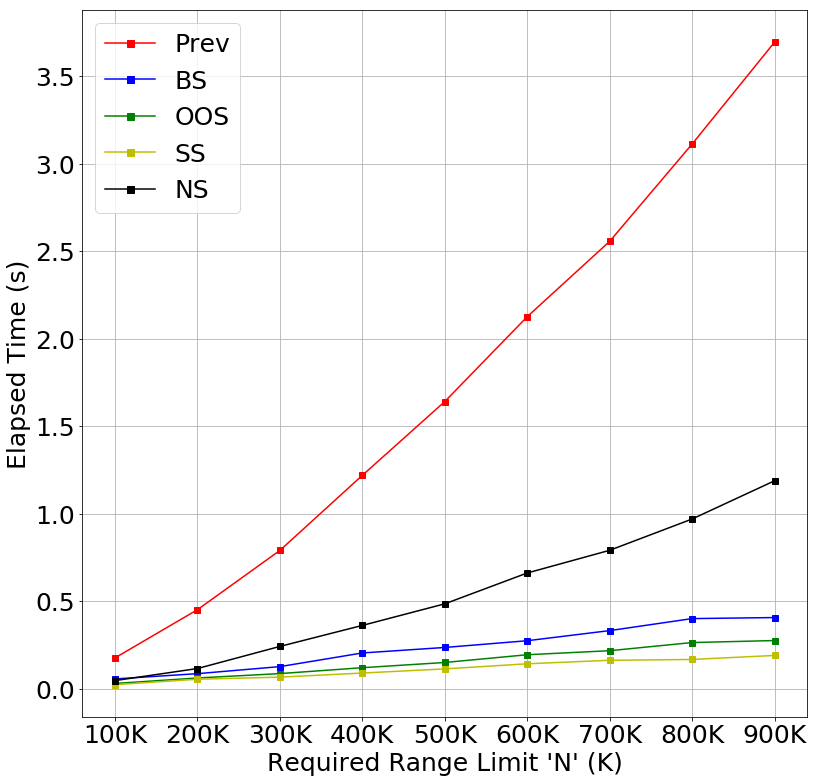

In [104]:
plt.grid()

plt.xlabel('Required Range Limit \'N\' (K)')
plt.ylabel('Elapsed Time (s)')

plt.xticks(Ns,['100K','200K', '300K', '400K', '500K', '600K', '700K', '800K', '900K'])

prev_line = mlines.Line2D([], [], color='r', marker='s', markersize=7, label='Prev')
bs_line = mlines.Line2D([], [], color='b', marker='s', markersize=7, label='BS')
oos_line = mlines.Line2D([], [], color='g', marker='s', markersize=7, label='OOS')
ss_line = mlines.Line2D([], [], color='y', marker='s', markersize=7, label='SS')
ns_line = mlines.Line2D([], [], color='k', marker='s', markersize=7, label='NS')
plt.legend(handles=[prev_line, bs_line, oos_line, ss_line, ns_line])

plt.plot(NS, prev_elapsed, 'r')
plt.plot(NS, prev_elapsed, 'rs', label='Prev')
plt.plot(NS, sieve1_elapsed, 'b')
plt.plot(NS, sieve1_elapsed, 'bs')
plt.plot(NS, sieve2_elapsed, 'g')
plt.plot(NS, sieve2_elapsed, 'gs')
plt.plot(NS, sieve3_elapsed, 'y')
plt.plot(NS, sieve3_elapsed, 'ys')
plt.plot(NS, sieve4_elapsed, 'k')
plt.plot(NS, sieve4_elapsed, 'ks')

import matplotlib.pylab as pylab
params = {'legend.fontsize': '25',
          'figure.figsize': (13, 13),
         'axes.labelsize': '25',
         'axes.titlesize':'25',
         'xtick.labelsize':'25',
         'ytick.labelsize':'25'}
pylab.rcParams.update(params)
plt.show()

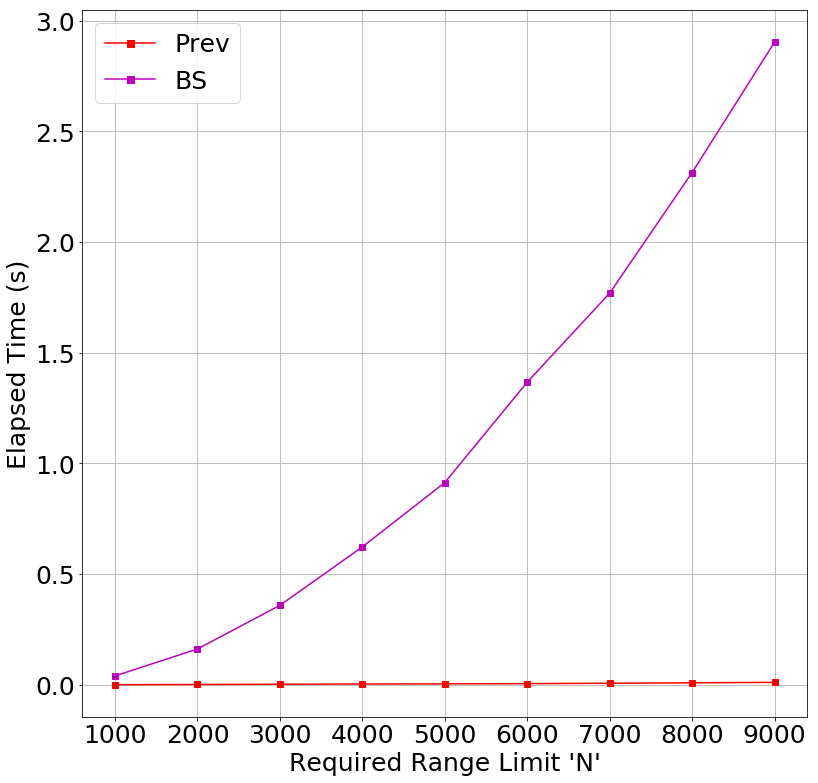

In [127]:
plt.grid()

plt.xlabel('Required Range Limit \'N\'')
plt.ylabel('Elapsed Time (s)')

prev_line = mlines.Line2D([], [], color='r', marker='s', markersize=7, label='Prev')
sieve_line = mlines.Line2D([], [], color='m', marker='s', markersize=7, label='BS')
plt.legend(handles=[prev_line, sieve_line])

plt.plot(NS, prev_elapsed, 'r')
plt.plot(NS, prev_elapsed, 'rs', label='Prev')
plt.plot(NS, prime_sieve_elapsed, 'm')
plt.plot(NS, prime_sieve_elapsed, 'ms')


In [116]:
#SS: 루트 값까지만 검사
def isPrimeSieve(N):
    #초기화
    
    if N <= 1:
        return False
    
    if N == 2:
        return True
    
    #짝수의 경우 초기화에서 처리
    primFlags = [False if (x)%2==0 else True for x in range(0,N + 1)]
    primFlags[0] = False
    primFlags[1] = False
    primFlags[2] = True
    
    for i in range(3, int(sqrt(N)) + 1):
        #소수가 아닌 경우 건너띄는 부분
        if primFlags[i] == False:
            continue
            
        if N%i == 0:
            return False
        
        #해당 소수의 배수는 전부 제외
        interval = 2 * i
        next = i + interval
        while next < int(sqrt(N)) + 1:
            primFlags[next] = False
            next += interval
    
    return primFlags[N]

In [120]:
def getPrimeTestSet( NS ):
    test_set = []
    for n in NS:
        primes = []
        for m in range(1, n):
            if isPrime(m):
                primes += [m]
        test_set += [primes]
    return test_set

prime_test_set = getPrimeTestSet( NS )

In [121]:
def getPrimeSieveTestSet( NS ):
    test_set = []
    for n in NS:
        primes = []
        for m in range(1, n):
            if isPrimeSieve(m):
                primes += [m]
        test_set += [primes]
    return test_set

prime_sieve_test_set = getPrimeSieveTestSet( NS )
print(prime_test_set == prime_sieve_test_set)

True


In [15]:
def getSieve1TestSet(r):
    test_set = []
    for n in r:
        primes = []
        primes_flag = sieve1(n)
        for m in range(2, n):
            if primes_flag[m]:
                primes += [m]
        test_set += [primes]
    return test_set

sieve1_test_set = getSieve1TestSet( NS )
print(prime_test_set == sieve1_test_set)

True


In [16]:
def getSieve2TestSet(r):
    test_set = []
    for n in r:
        primes = []
        primes_flag = sieve2(n)
        for m in range(2, n):
            if primes_flag[m]:
                primes += [m]
        test_set += [primes]
    return test_set

sieve2_test_set = getSieve2TestSet( Ns )
print(prime_test_set == sieve2_test_set)

True


In [17]:
def getSieve3TestSet(r):
    test_set = []
    for n in r:
        primes = []
        primes_flag = sieve3(n)
        for m in range(2, n):
            if primes_flag[m]:
                primes += [m]
        test_set += [primes]
    return test_set

sieve3_test_set = getSieve3TestSet( Ns )
print(prime_test_set == sieve3_test_set)

True


In [18]:
def getSieve4TestSet(r):
    test_set = []
    for n in r:
        primes = []
        primes_flag = sieve4(n)
        for m in range(2, n):
            if primes_flag[m]:
                primes += [m]
        test_set += [primes]
    return test_set

sieve4_test_set = getSieve4TestSet( Ns )
print(prime_test_set == sieve4_test_set)

True


In [19]:
def printWrongPrime(ans, test): 
    wrong = []
    
    j = 0
    for i in range(0, len(ans)):
        if(ans[i] != test[j]):
            print(ans[i])
            print(test[j])
            j += 2
        else:
            j += 1
        
    
    #print(wrong)
    
printWrongPrime(test_set[0], sieve3_test_set[0])
print(test_set[0])
#print(sieve3_test_set[0])

NameError: name 'test_set' is not defined